# Probability 2 (Master Data science, University of Lille) / CMF (Centrale Lille, G3 SDIA)

---

## Lab 2 - Queues, Metropolis-Hastings and simulated annealing

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate queues, implement an example of a Metropolis-Hasting algorithm and simulated annealing.

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab2_Name1_Name2
- duplicate the notebook file and rename it lab2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab2 --file=requirement.txt
    conda activate lab2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation

## <a name="content">Contents</a>
- [Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues](#ex1)
- [Exercise 2: Drawing samples from the Ising model with the Metropolis-Hasings algorithm](#ex2)
- [Exercise 3: Simulated annealing for the *traveling salesman* problem](#ex3)

---
## <a name="ex1">Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues</a> [(&#8593;)](#content)

This exercise will focus on simulating an $M/M/1/\infty$ and an $M/M/1/K$ queue to illustrate some of the results covered in lecture 5. <!--in Chapter 2 and in TD.3-->

In the following, the parameter of the exponential distributions governing the inter-arrival and service times will be denoted $\lambda$ and $\mu$ respectively, with $0< \lambda < \mu $. The time instants at which changes occur in the process $X(t)$ will be denoted by $T_n$ for $n \in \mathbb{N}$. We further define:

\begin{equation}
    \rho = \frac{\lambda}{\mu}, \; X_n = X(T_n).
\end{equation}

### $M/M/1/\infty$-queue

1\. a) Using the lecture notes, implement a function to simulate a trajectory $X(t)$ of an $M/M/1/\infty$ process, where $X(t)$ represents the number of customers in the system at time $t$. <!--  from Chapter 2, Section 2.3.1 -->

> *Remark*: the signature of the function could be of the form:
``` python
def run_mm1inf(lambd: float, mu: float, rng, niter: int):
    """
    Args:
        lambd (float): birth rate.
        mu (float): death rate
        rng (int): random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if lambd <= 0.
        ValueError: error triggered if mu <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
```

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.image import AxesImage
from numpy.random import Generator, PCG64
rg = Generator(PCG64(0))


We implement the function to simulate the trajectory of $X(t)$, the number of customers in the system at time $t$ of an $M/M/1/\infty$ process :

- We consider that we have initially only one customer in the queue : $X_0 = 1$. 

- If we are at iteration n, the waiting time before the next change follows $t \sim exp(\lambda + \mu)$.

- At the random time $t$, a new customer arrives in the system ($X_{n+1} = X_{n}+1$ with probability $\frac{\lambda}{\lambda + \mu}$ or leaves the system $X_{n+1} = X_{n}-1$) with probability $\frac{\mu}{\lambda + \mu}$. 





In [61]:
def run_mm1inf(lambd: float, mu: float, rng, niter: int):
    """
    Args:
        lambd (float): birth rate.
        mu (float): death rate
        rng (int): random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if lambd <= 0.
        ValueError: error triggered if mu <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
    if mu<=0: raise ValueError('error triggered if mu <= 0')
    if lambd<=0: raise ValueError('error triggered if lambd <= 0')
        
    X=np.zeros(niter) # Array containing the markov chain trajectory
    T=np.zeros(niter) # array containing time instants 
   
    t=rng.exponential(scale=1/(lambd+mu)) # time at which the first change occurs. 
    x=1 ## initially, we have one customer in the queue to be treated. 
    X[0]=x
    T[0]=t
    for i in range(1,niter):
        t+=rng.exponential(scale=1/(lambd+mu),) ## times at which changes occurs. 
        if X[i-1]==0: 
            x+=1 ## when there is 0 customers in the system we can only receive one.  
        
        else:
            a=rng.uniform(0,1) 
            if a<lambd/(lambd+mu): x+=1 ## we have a new customer in the queue
            else: x-=1 #a customer have been treated
        
        T[i]=t
        X[i]=x

    return X,T
    

b) Display the generated trajectory of the process for $(\lambda,\mu) = (5, 6)$ (e.g., use only the last 100 samples of the trajectory to obtain a representative illustration).

> *Hint*: use the function `step` from the matlplotlib library.

We compute a 10000 trajectory of the process for $(\lambda,\mu) = (5, 6)$. We display the last 100 samples : 

In [64]:
lambd,mu=5,6
X,T=run_mm1inf(lambd,mu, rg, 10000)
print('last 100 states of the trajectory X=',X[-100:])
print('last 100 change times of the trajectory T=',T[-100:])

last 100 states of the trajectory X= [ 3.  4.  3.  2.  3.  4.  3.  4.  5.  6.  7.  8.  9. 10. 11. 10.  9.  8.
  7.  8.  9. 10.  9.  8.  7.  6.  7.  8.  9. 10.  9.  8.  9. 10. 11. 10.
  9. 10. 11. 10. 11. 12. 13. 14. 15. 16. 17. 18. 17. 16. 15. 14. 15. 14.
 13. 12. 11. 10.  9.  8.  7.  8.  9. 10.  9.  8.  7.  8.  9.  8.  7.  8.
  7.  6.  5.  6.  5.  4.  3.  4.  3.  2.  1.  0.  1.  0.  1.  2.  3.  2.
  1.  2.  1.  2.  3.  2.  3.  4.  3.  2.]
last 100 change times of the trajectory T= [895.08387729 895.17951976 895.20697034 895.31222575 895.41286618
 895.43216625 895.4837719  895.54059134 895.64020327 895.71904818
 895.95544946 896.06543827 896.08071282 896.16054632 896.19828355
 896.28683818 896.29131717 896.31383226 896.34451074 896.70130584
 896.73300701 896.73555482 896.76349577 896.76582398 896.85514795
 896.89854992 897.00117366 897.03761393 897.08481816 897.10894436
 897.14623114 897.36203679 897.36791839 897.40080958 897.41151658
 897.43960531 897.56929317 897.64868963 897.9243512

2\. a) Display on the same graph the normalized histogram of $(X_n)_n$ and the stationary distribution $\pi$ defined by (see Proposition 2.15 of the lecture notes)

\begin{equation}
    (\forall i \in \mathbb{N}), \; \pi(i) = (1 - \rho)\rho^i.
\end{equation}

What does this graph illustrate?

We plot the normalized histogram of $(X_n)_n$ and we compare it to the stationary distribution $\pi$ : 

Text(0, 0.5, 'density')

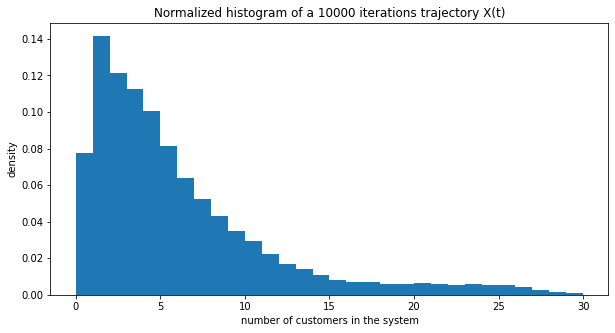

In [87]:
rho = lambd/mu
f_pi = lambda i : (1-rho)*rho**i
figure = plt.figure(figsize=(10,5))
n,bins,a = plt.hist(X, density=True, bins=int(np.max(X)))
plt.title('Normalized histogram of a 10000 iterations trajectory X(t)')
plt.xlabel('number of customers in the system')
plt.ylabel('density')

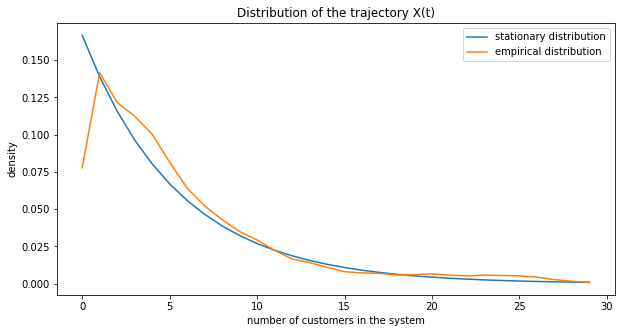

In [88]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(int(np.max(X))),f_pi(np.arange(int(np.max(X)))), label = 'stationary distribution')
plt.plot(n, label = 'empirical distribution')
plt.title('Distribution of the trajectory X(t)')
plt.xlabel('number of customers in the system')
plt.ylabel('density')
plt.legend()

We observe that the empirical distribution of the trajectory corresponds to the stationary distribution. This is due to the fact that we considered a large trajectory ($n_{iter} = 10000$) and thus stationarity has been reached. 

However, we can see that the empirical distribution doesn't fit the stationary one at 0. This is due to the fact that we considered that when there was 0 customers in the system we could only receive one ( no customer can leave the system when there is none). 

b) Empirically evaluate the average number of customers, whose value should be close close to the theoretical value $\frac{\rho}{1-\rho}$.

We evaluate the average number of customers : 

In [91]:
print('E(X)= ', np.mean(X),'\nrho/(1-rho)= ', rho/(1-rho))

E(X)=  5.5974 
rho/(1-rho)=  5.000000000000002


We can see that the average number of customers in the system is 5. THe empirical result is really close to the theoretical one. 

### $M/M/1/K$

Consider the case where the size of the capacity service $K$ is finite, i.e., where the system can only accommodate up to $K$ customers. In comparison with the previous case, any new customer trying to enter the system at a time instant $t$ will be systematically rejected if $X(t) = K$.

3\. a) Propose a variant of the function developed in 1.a) to simulate a trajectory of an $M/M/1/K$ process.

We propose a variant to the precedent function. The only difference is the following : 

- A new customer entering in the system is rejected if there is already $K$ customers in the system : 

In [93]:
def run_mm1k(lambd: float, mu: float, rng, niter: int, k: int):
    """
    Args:
        lambd (float): birth rate.
        mu (float): death rate
        rng (int): random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
        k (int): capacity service
    Raises:
        ValueError: error triggered if lambd <= 0.
        ValueError: error triggered if mu <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
    if mu<=0: raise ValueError('error triggered : mu <= 0')
    if lambd<=0: raise ValueError('error triggered : lambd <= 0')
        
    X=np.zeros(niter)# Array containing the markov chain trajectory
    T=np.zeros(niter) # array containing time instants 
          
    t=rng.exponential(scale=1/(lambd+mu)) # time at which the first change occurs. 
    x=1 ## initially, we have one customer in the queue to be treated. 
    X[0]=x
    T[0]=t
    for i in range(1,niter):
        t+=rng.exponential(scale=1/(lambd+mu)) ## times at which changes occurs. 
        if X[i-1]==0:
            x+=1
        
        else:
            a=rng.uniform(0,1)
            if a<lambd/(lambd+mu):
                if X[i-1]<k: x+=1 ## we reject the customer if there are already K customers in the queue. 
            else: x-=1
      
        T[i]=t  
        X[i]=x
    
    return X,T

b) Display the trajectory of the process for $(\lambda,\mu, K) = (5, 6, 3)$.

We display the last 100 samples of the trajectory for $(\lambda,\mu, K) = (5, 6, 10)$. (We can also display for $K=3$ but it is not really interesting for comparing the empirical and theoretical distributions od the trajectory).  

In [106]:
lambd,mu,k=5,6,10
X,T=run_mm1k(lambd,mu, rg, 10000, k)
print('X=',X[-100:])
print('T=',T[-100:])

X= [ 8.  7.  8.  9.  8.  7.  8.  9. 10. 10.  9.  8.  9.  8.  7.  8.  9.  8.
  7.  8.  7.  8.  9.  8.  9. 10. 10. 10. 10. 10.  9.  8.  9. 10. 10.  9.
 10. 10.  9. 10. 10.  9.  8.  7.  8.  7.  6.  7.  8.  7.  8.  9. 10.  9.
 10.  9.  8.  9.  8.  7.  6.  5.  6.  5.  4.  5.  6.  7.  6.  5.  6.  5.
  4.  3.  2.  3.  4.  3.  4.  5.  6.  7.  6.  5.  6.  5.  6.  5.  6.  5.
  4.  5.  6.  7.  6.  5.  6.  5.  6.  7.]
T= [894.92469363 895.00154492 895.10766528 895.21919453 895.23933226
 895.43659473 895.53808766 895.55563621 895.76806633 895.7705054
 895.84969713 895.8595891  896.01313284 896.1739448  896.2845272
 896.41787346 896.4456228  896.4479989  896.62102785 896.74155075
 896.82537292 896.84854496 896.88506362 896.88797689 897.01664504
 897.04485646 897.09562126 897.17458436 897.23230118 897.52998806
 897.53312521 897.56970853 897.72243048 897.76162905 897.77363166
 897.77875021 897.78527623 897.84263526 897.98133719 898.00244528
 898.02455539 898.23313142 898.24786563 898.29961232 898.3334

4\. a) Display on the same graph the normalized histogram of $X_n$ and the stationary distribution $\pi$ defined as

\begin{equation}
    (\forall i \in \mathbb{N}), \; \pi(i) =
    \begin{cases}
        \frac{(1-\rho)\rho^i}{1-\rho^{K+1}} & \text{if } i \in \{0, 1, \dotsc, K \} \\
        0 & \text{otherwise.}
    \end{cases}
\end{equation}

What does this graph illustrate?

Text(0, 0.5, 'density')

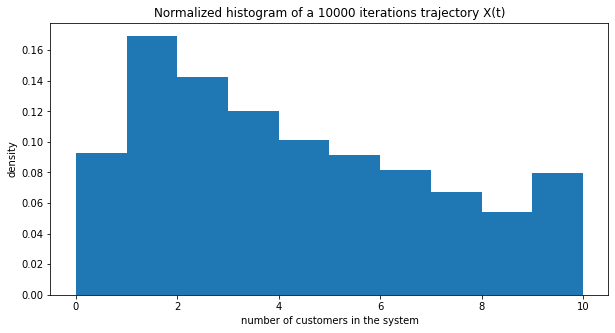

In [107]:
rho=lambd/mu
f_pi=lambda i : (1-rho)*rho**i/(1-rho**(k+1)) * (i<=k)
figure = plt.figure(figsize=(10,5))
n,bins,a = plt.hist(X, density=True, bins=int(np.max(X)))
plt.title('Normalized histogram of a 10000 iterations trajectory X(t)')
plt.xlabel('number of customers in the system')
plt.ylabel('density')

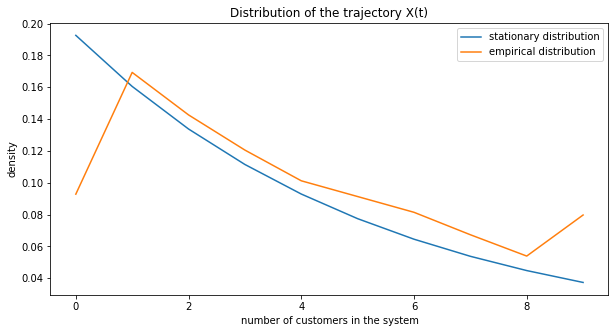

In [108]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(int(np.max(X))),f_pi(np.arange(int(np.max(X)))), label = 'stationary distribution')
plt.plot(n, label = 'empirical distribution')
plt.title('Distribution of the trajectory X(t)')
plt.xlabel('number of customers in the system')
plt.ylabel('density')
plt.legend()

We observe that the empirical distribution of the trajectory fits the stationary distribution everywhere excepts on the boundaries : 

- In 0, the empirical distribution doesn't correspond to the stationary distribution because we consider necessarily that a customer arrives after a random time $t \sim exp(\lambda +\mu)$, which is not necessarily true. 

- In $K$, we reject all customers that arrive at random times  $t \sim exp(\lambda +\mu)$, which also perturbs the distribution of the trajectory. 

Comparing the empirical and stationary distribution for $k=3$ wouldn't be interesting as there is only two point excepts the boundaries 0 and 3.

b) Compute the theoretical average number of customers, and numerically evaluate its value using the function developed in 3.a). <!--(see TD3, exercise 3)-->

The theoritical average number of customers is given by : 

In [118]:
E_th = np.sum([i*f_pi(i) for i in range(k+1)]) 
print("Theorical average number of customers : ",E_th)
print('empirical average number of customers : ', np.mean(X))

Theorical average number of customers :  3.2892913216308024
empirical average number of customers :  3.822


The empiricial average number of customers corresponds to the theorical one. 

---
## <a name="ex2">Exercise 2: Drawing samples from the Ising model with the Metropolis-Hasings algorithm</a> [(&#8593;)](#content)

Consider the 2D Ising model covered in Chapter 3, section 3 of the lecture notes, taken over an $N \times N$ grid for $N = 64$, with $\beta = 0.6$. <!-- Chapter 3, p.36 -->

1\. Implement a Metropolis-Hastings algorithm to draw samples from the 2D Ising model in the above configuration. Progressively display the evolution of the image as the algorithm evolves. Generate 1000 such variables, starting from a random configuration. Qualitatively comment the content of the last few generated samples, in comparison with the initial state.

> *Note*: a) the matlpotlib examples given [here](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/) can be useful
>
> b) given the relatively slow evolution from one itearition to another, you may display the current state of the image only once every 20 iterations.

We implement the metropolis Hasting algorithm to draw samples from the 2D Ising model. 

We want to sample from the state space $S = (-1,1)^{N*N}$, with the following probability : 

\begin{equation}
  \pi(B) = \frac{1}{Z_{beta}} exp(-\beta H(B))
\end{equation}

with : 

- $H(B)$ : energy of B in S


We don't know the normalising constant $Z_{beta}$, this is the reason why we use Metropolis Hasting to sample from this distribution. 

Here, we will consider $N=32$ (N=64 takes too much time to compute), $\beta = 0.6$ and compute $niter = 10000$ iterations of the Markov Chain :


In [46]:
rg = Generator(PCG64(0))
niter=10000
N=32
beta=0.6

We compute the energy of any state $B$ in $S$ : 

In [47]:
def energy(B):
    """
    Args:
        B : N*N array with values bij in {-1; 1}.
    Raises:
        ValueError: error triggered if B not in {-1,1}^(N*N)
    Returns:
        h : Energy of the Matrix
    """ 
    N = len(B)
    
    for i in range(N): 
        for j in range(N): 
            if int(B[i,j])!= 1 :
                if int(B[i,j])!= -1 : raise ValueError('B not in {-1,1}^(N*N)')
    h=0
    for i in range(N):
        for j in range(N):
            if i != N-1: h+= -B[i,j]*B[i+1,j]
            if i != 0: h+= -B[i,j]*B[i-1,j]
            if j != N-1: h+= -B[i,j]*B[i,j+1]
            if j != 0: h+= -B[i,j]*B[i,j-1]
    
    return h  

We define the quantity $\alpha$ used by the algorithm between two states as the following : 

\begin{equation}
  \alpha = \exp{(-\beta (H(B') - H(B))}
\end{equation} 

with :
- B : current state 
- B': possible next state 



In [48]:
def alpha(beta, B1, B2): 
    """
    Args:
        beta : positive float. Beta parameter from the Boltzman probability of states.  
        B1 : N*N array. initial state B1
        B2 : N*N array. new state B2
    Returns:
        alpha value corresponding to states B1 and B2. 
    """ 
    return min(1,np.exp(-beta*(energy(B2)-energy(B1))))

The Metropolis Hasting algorithms works as follow : 

At each iteration $n$ : 

- We select $B'$, that differs from $B$ in only one site. The site is chosen with uniform probability $N^{-2}$ among the N*N sites of the matrix. 

- We compute $\alpha$ and generate a uniform $u$ variable on $[0,1]$. 

- If $u<\alpha$, $X_n = B'$ : $B'$ becomes the new state.
- If $u>\alpha$, $X_n = B$ : the Markov Chain stays in the current state.


In [54]:
def MetropolisHasting(niter, beta): 

  """
  Args:
      niter :  int. Number of iterations of the algorithm 
  Returns:
      X : array of shape : (niter, N, N) : markov chain containing the different states at each iteration.  
  """ 
  X = np.zeros((niter,N,N)) # vector containing each the states taken by the Markov Chain
  
  ## Initial state : 
  x = rg.choice((-1,1),size=(N,N))
  X[0] = x.copy()
  
  for i in range(1,niter):
      ## New state candidate :  
      new_state = x.copy()
      to_change = tuple(rg.choice(N, size=2)) ## The new candidate differs from the actual state in one site, taken randomly with uniform proba in (N*N). 
      new_state[to_change] = -new_state[to_change] ## change the site
      
      ## We compute alpha : 
      if rg.uniform(0,1) <= alpha(beta, x, new_state): 
          ## We accept the candidate
          x=new_state.copy()

      X[i] = x.copy()
  return X
  

In [50]:
X = MetropolisHasting(niter, beta)

We plot the evolution of the Markov Chain each 20 steps : 

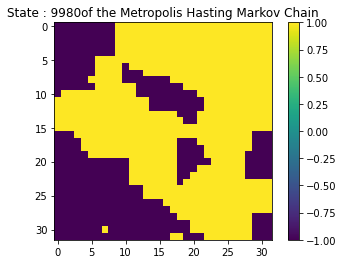

In [53]:
N_frames=np.int(10000/20) 
interval=200

#plt.imshow(X[0])
#plt.title('L\'état 0')

fig, ax = plt.subplots()

ax.set_xlim((0, N-1))
ax.set_ylim((0, N-1))

def init():
    a=plt.imshow(X[0])
    return (a,)
    
def animate(i):
    plt.clf()
    a=plt.imshow(X[20*i])
    plt.title('State : ' +str(20*i)+" of the Metropolis Hasting Markov Chain")
    plt.colorbar()
    return (a,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N_frames, interval=interval, 
                               blit=True)

HTML(anim.to_html5_video())

We observe that spins tend to regroup in the last samples of the Markov Chain. 

This is due to the fact that after a certain number of iterations (burn in period), the algorithm starts sampling from the target distribution $\pi(B)$ previously defined.

This distribution favors the states with low energy, which corresponds to states where spins regroups. 

The samples from the first iterations (burn-in period) of the algorithm aren't sampled from the target distribution : They seem to be randomly generated.  

2\. [$\cdot$/1] Decrease the value of the parameter $\beta = 0.1$, and generate 1000 new variables with the algorithm implemented in 1. What is the influence of the parameter $\beta$?

In [55]:
niter=10000
N=32
beta=0.1

In [56]:
X = MetropolisHasting(niter, beta)

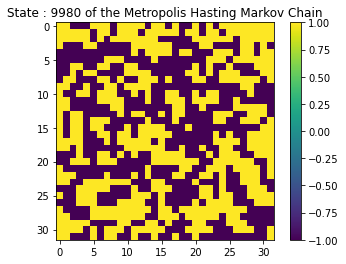

In [57]:
N_frames=np.int(10000/20) 
interval=200

#plt.imshow(X[0])
#plt.title('L\'état 0')

fig, ax = plt.subplots()

ax.set_xlim((0, N-1))
ax.set_ylim((0, N-1))

def init():
    a=plt.imshow(X[0])
    return (a,)
    
def animate(i):
    plt.clf()
    a=plt.imshow(X[20*i])
    plt.title('State : ' +str(20*i)+" of the Metropolis Hasting Markov Chain")
    plt.colorbar()
    return (a,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N_frames, interval=interval, 
                               blit=True)

HTML(anim.to_html5_video())

We observe that the spins aren't regrouped as much as they where in the previous execution of the algorithm (for $\beta=0.6$). 

This is because the parameter $\beta$ controls how much we want our target distribution $\pi_b$ to favors low energy states.

When $\beta$ is high, high state energies are very unlikely (probability proportional to $\exp(-\beta H(B))$. Thus spins tend to regroup : this is what we observed in the first simulation. 

When $\beta$ is lower, high states energy are more likely (even if unlikely), thus we observe states where spins regroup but in a less separated way. 

---
## <a name="ex3">Exercise 3: Simulated annealing for the *traveling salesman* problem</a> [(&#8593;)](#content)

This exercise will be focused on the implementation of a basic simulated annealing algorithm to minimize a function $f : E \subset \mathbb{N} \rightarrow \mathbb{R}$, where $E$ is finite. An application to the *traveling salesman* problem will then be considered to test the algorithm implementation. 

In general, a simulated annealing algorithm can be described as follows.

---
**Simulated annealing**

Set $x_0 \in E$, $T_0  > 0$. 

$n \leftarrow 0$

While $(n \leq N)$ and $(T_n > T_{\min})$

  1. Draw a point $y \sim Q(x_n, \cdot)$ in the neighborhood of $x_n$, and $u \sim \mathscr{U}([0,1])$ (where $\mathscr{U}$ is the uniform distribution)
  
  2. Compute the acceptance probability: 
  
\begin{equation} 
    p(f(x_n), f(y), T_n) = 
    \begin{cases}
        1 & \text{if } f(y) < f(x_n) \\
        \text{e}^{-(f(y) - f(x_n))/T_n} & \text{otherwise.}
    \end{cases}
\end{equation}
  
  3. Set $x_{n+1} = \begin{cases}
       y & \text{if } u \leq p(f(x_n), f(y), T_n) \\
       x_n & \text{otherwise.}
       \end{cases}$
  4. Set $T_{n+1} = \frac{T_0}{\log(n+2)}$
  5. $n \leftarrow n+1$

Return $x_N$, $\bigl( f(x_n) \bigr)_{1 \leq n \leq N}$

> *Note*: in practice, the transition kernel $Q$, the neighborhood of the current point $x_n$ needs to be defined by the user, depending on the problem of interest. The definition of the other elements will be specified later for the *traveling salesman* problem.

---

1\. Implement a generic `simulated_annealing` function to be run for a maximum of $N$ iterations.

> *Note*: you can for instance create an object gathering several abstract methods to be instanciated (e.g., `draw_neighbour`, `acceptance_probability`, ...). Using functions and lambda functions is another possibility.

We implement two class : 

1. State : a state is described by a $\textbf{value}$, and contains two methods to be implemented : 

- get_neighboor : returns a new state corresponding to a neighboor of the actual state.

- cost() : returns the cost of the actual state.


2. Simulated_annealing :  an object of the class Simulated_annealing is characterised by : 

- its initial temperature $T$. 
- The number of iterations $n_{iter}$ of the Simulated_annealing. 
- a list of $\textbf{states}$. 

The methods of the class are :

- algorithm : performs the Simulated_annealing algorithm. 
- accept_neighboor : compare the last state of the simulated_annealing with his selected neighboor in order to accept him or not. 


In [228]:
class State:

  def __init__(self, value):
    ## Constructor of the class
    self.value = value
    
  def get_neighboor(self):
    """
    Returns:
        State object : selected neighboor of the actual state with its value.  
    """ 
    value = rg.choice(np.delete(np.arange(N),self.value))
    return State(value)

  def cost(self): 
    """
    Returns:
        int : cost of the actual state. 
    """ 
    return self.value
  
class Simulated_annealing:

    def __init__(self, initial_state, T, niter):
        self.states=[initial_state]
        self.T = T
        self.niter = niter
    
    def accept_neighboor(self, t, x, y):
      """
      Input : 
          t : actual temperature of the Simulated_annealing
          x : actual state
          y : neighboor state to be compared 
      Returns:
          bool : true if neighboor is accepted 
                  False if rejected
      """ 
      if y.cost()< x.cost()  : 
        p = 1
      else : 
        p = np.exp(-((y.cost()-x.cost())/t))
      return rg.uniform(0,1)<=p
      
    def algorithm(self): 
      """
        doesn't return anything but appends the states list attribut of the Simulated_annealing object
      """ 
      Tmin = 1e-5
      t = self.T
      i = 1
      while (i<self.niter + 1) and (t>Tmin):
        neighboor = self.states[-1].get_neighboor()
        if self.accept_neighboor(t, self.states[-1], neighboor) : 
          self.states.append(neighboor)
        else : 
          self.states.append(self.states[-1])
        t = t*np.log(i+1)/np.log(i+2)
        i = i+1
    
   

We test our algorithm for a basic State class : 

- State space values corresponds to integers between 1 and 20. 

- Neighboors values are selected randomly in [1, 20]\\{actual_state_value}. 

- cost function coresponds to the state value : states with high values will be difficult to accept. The Optimum of the cost function is 0.

We execute the simulated annealing for $n_{iter} = 10000$  and $T = 10$: 

In [246]:
rg = Generator(PCG64(0))
N = 20
niter=10000
T = 10
x0=State(rg.choice(N))
simulated_annealing=Simulated_annealing(x0, T, niter)


In [247]:
simulated_annealing.algorithm()

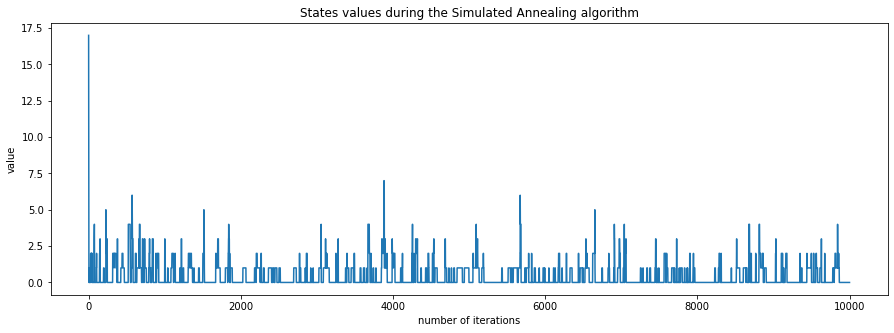

In [249]:
X=[state.value for state in simulated_annealing.states]
plt.figure(figsize=(15,5))
plt.title('States values during the Simulated Annealing algorithm')
plt.xlabel('number of iterations')
plt.ylabel('value')
plt.plot(X)
plt.show()



We observe that the final state value of the simulated annealing algorithm is 0, which corresponds to the cost function optimum. 

We observe that during the execution, the algorithm reached several times the global minimum, came out from it in order to search for better minimums before coming back to it as it didn't find any better minimum. 

The algorithm implemented in 1. will be applied to the *traveling salesman* problem, briefly described in the following lines.

---
**The Traveling Salesman problem**

A salesman must find the shortest route going only once through $K$ cities, represented by the points $C_1, \dotsc, C_K$ in $\mathbb{R}^2$. In this case, the set of all possible routes $E$ contains $K!$ elements, which excludes an exhaustive search as $K$ increases (*e.g.*, for $K \geq 10$). For this application, the problem thus consists in finding a route, i.e., a permutation $\sigma$ in the symmetric group $\Sigma_K$, minimizing the function

\begin{equation}
    \sigma = \bigl( \sigma(1), \dotsc , \sigma(K) \bigr) \mapsto f(x) = \sum_{i = 1}^{K} \text{dist} (C_{\sigma(i)}, C_{\sigma(i+1)})
\end{equation}

with the convention $\sigma(K+1) = \sigma(1)$. In this case, simulated annealing randomly explores $\Sigma_K$ from one possible route to another located in its vicinity (which needs to be defined). 

In the following, the route $\tilde{\sigma} = \bigl( \tilde{\sigma}(1), \dotsc, \tilde{\sigma}(K) \bigr)$ will be said to be a neighbour of $\sigma = \bigl( \sigma(1), \dotsc, \sigma(K) \bigr)$ if there exists $1 \leq i < k \leq K $ such that:

\begin{equation}
   \bigl( \tilde{\sigma}(1), \dotsc ,\tilde{\sigma}(K) \bigr) = \bigl( \sigma(1), \dotsc, \sigma(i−1), \sigma(k), \sigma(k−1), \dotsc, \sigma(i+1), \sigma(i), \sigma(k+1), \dotsc, \sigma(K) \bigr). 
\end{equation}

For instance, for $K = 8$, the permutations $(1,2,3,4,8,7,6,5)$ and $(1,2,7,8,4,3,6,5)$ are neighbours (with $i = 3$, $k = 6$).

---

2\. Fully instantiate the simulated annealing algorithm for the traveling salesman problem. Take the $\ell_2$ norm for $\text{dist}$.

In [317]:
class Route(State):

  def __init__(self, value, cities):
    ## Constructor of the class
    self.value = value
    self.cities = cities

  def cost(self): 
    """
    Returns:
        int : cost of the actual state. 
    """ 
    d=0
    for i in range(len(self.value)-1):
        d+=np.linalg.norm(self.cities[self.value[i+1]]-self.cities[self.value[i]])
    #d+= np.linalg.norm(self.cities[self.value[-1]]-self.cities[self.value[0]])
    return d
        
  def get_neighboor(self):
    """
    Returns:
        State object : selected neighboor of the actual state with its value.  
    """ 
    idx=rg.choice(K,size=2, replace=False)
    i,k=np.min(idx),np.max(idx)
    
    value2 = self.value.copy()
    
    if i==0: value2[i:k+1]=value2[k::-1]
    else: value2[i:k+1]=value2[k:i-1:-1]

    return Route(value2, self.cities)


3\. Test your algorithm for $K = 50$ randomly located cities (i.e., generate the values of $(C_k)_{1 \leq k \leq K}$ randomly). Display both the evolution of the cost function with the iterations and the final route. Empirically tune the value $T_0$ to improve the result of the algorithm.

> *Notes*:
>
> a) for reproducibility, set the random seed of the random number generator to a specific value, *e.g.*, 0;
>
> b) to generate an initial path $x_0$, you can for instance randomly select a starting city $k$, and define the next city sequentially by taking its *nearest neighbour*;
>
> c) to display the trajectory, you can use `matplotlib.pyplot.arrow` to display an arrow between two consecutive points.

We create $50$ random cities and initiate a first Route $x0$ : 

In [318]:
rg = Generator(PCG64(15))
K=40

cities=rg.random(size=(K,2))
x0=Route(rg.permutation(K), cities)

We compute the Simulated_annealing algorithm with different initial tempartures $T$. We check the cost of the final Route obtained at each execution of the algorithm : 

In [319]:
T = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 4, 8]
L = []
for t in T : 
  simulated_annealing=Simulated_annealing(x0, t, niter)
  simulated_annealing.algorithm()
  L.append(simulated_annealing.states[-1].cost())

Text(0, 0.5, 'cost')

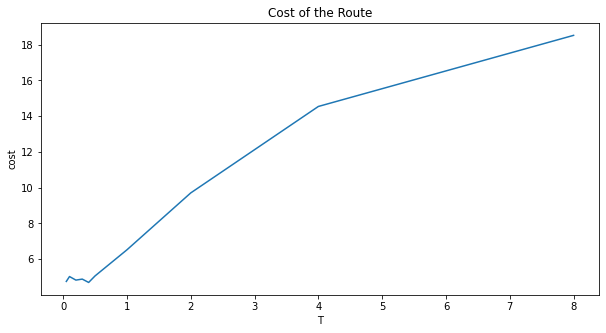

In [320]:
fig = plt.figure(figsize = (10,5))
plt.plot(T,L)
plt.title('Cost of the Route')
plt.xlabel('T')
plt.ylabel('cost')

It appears that $T = 0.1$ is a good starting temperature for the algorithm : 

In [322]:
t= 0.1
simulated_annealing=Simulated_annealing(x0, t, niter)
simulated_annealing.algorithm()

We display the trajectory :

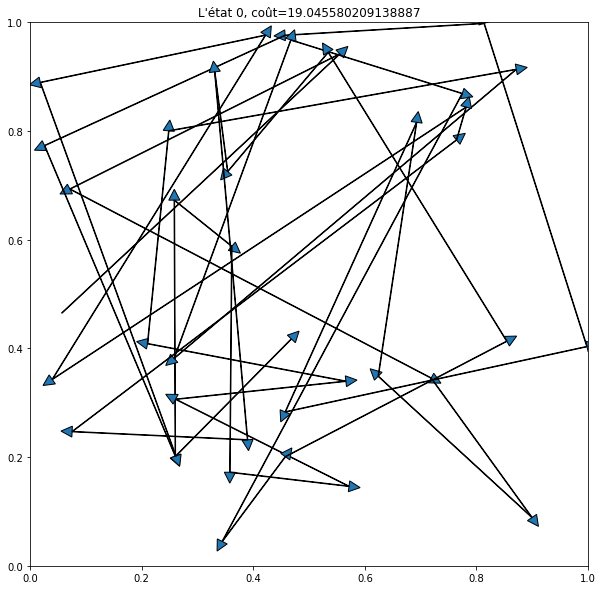

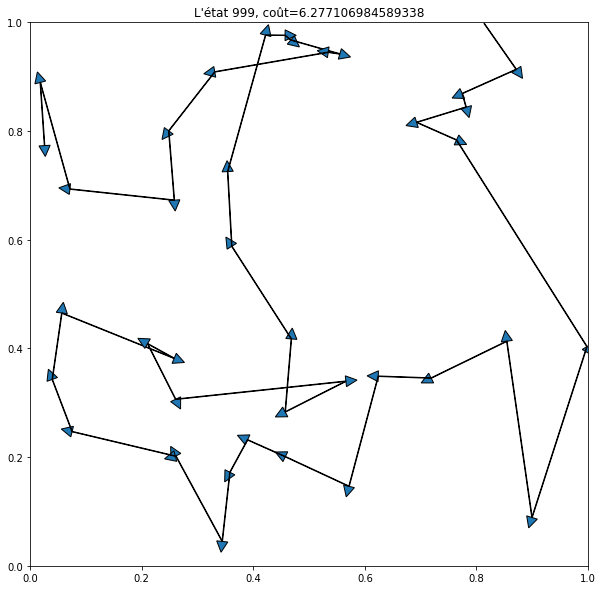

In [323]:
N_frames=1000
interval=100000//N_frames

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(( 0, 1))
ax.set_ylim(( 0, 1))

for k in range(K-1):
    plt.arrow(cities[X[0,k],0],
              cities[X[0,k],1],
              cities[X[0,k+1],0]-cities[X[0,k],0],
              cities[X[0,k+1],1]-cities[X[0,k],1],
              head_starts_at_zero=False,head_width=0.02,head_length=.02)
plt.title('L\'état 0, coût='+str(simulated_annealing.states[0].cost()))

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(( 0, 1))
ax.set_ylim(( 0, 1))

def init():
    #fig, ax = plt.subplots()
    a=plt.scatter(0,0)
    return (a,)
    
def animate(i):
    plt.clf()
    #plt.arrow(0,0,0,0)
    for k in range(K-1):
        a=plt.arrow(cities[X[i,k],0],
                    cities[X[i,k],1],
                    cities[X[i,k+1],0]-cities[X[i,k],0],
                    cities[X[i,k+1],1]-cities[X[i,k],1],
                    head_starts_at_zero=False,head_width=0.02,head_length=.02)
    plt.title('L\'état '+str(i)+', coût='+str(simulated_annealing.states[i].cost()))
    
    return (a,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N_frames, interval=interval, 
                               blit=True)

HTML(anim.to_html5_video())